<a href="https://colab.research.google.com/github/VinayBorate/Zeotap_assignment/blob/main/Task_3_Customer_Segmentation_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [8]:
# Read the CSV files
customers = pd.read_csv("/content/drive/MyDrive/Zeotap_Assignment/data/Customers.csv")
products = pd.read_csv("/content/drive/MyDrive/Zeotap_Assignment/data/Products.csv")
transactions = pd.read_csv("/content/drive/MyDrive/Zeotap_Assignment/data/Transactions.csv")

In [9]:
merged = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

In [10]:
# Feature Engineering for Clustering
segmentation_features = merged.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'TransactionID': 'count'  # Frequency of transactions
}).reset_index()

In [15]:
# Normalize data
scaler = StandardScaler()
# profile_features = scaler.fit_transform(customer_profiles_encoded.drop('CustomerID', axis=1))

In [16]:
# Normalize features
clustering_features = scaler.fit_transform(segmentation_features.drop('CustomerID', axis=1))

In [17]:
# Apply K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(clustering_features)
segmentation_features['Cluster'] = kmeans.labels_

In [18]:
# Evaluate Clusters using DB Index
db_index = davies_bouldin_score(clustering_features, kmeans.labels_)
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 0.8967286185530712


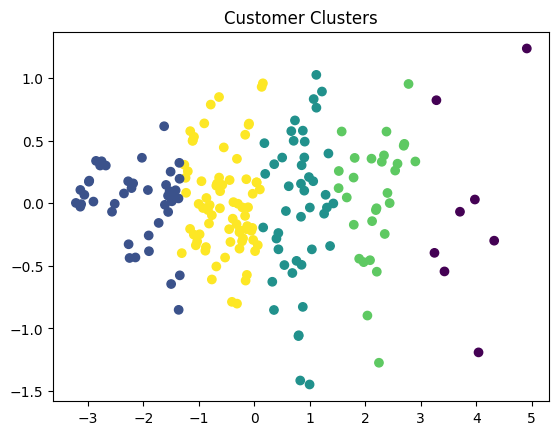

In [22]:
# Visualize Clusters
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(clustering_features)
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('Customer Clusters')
plt.show()


In [23]:
# Save results
segmentation_features.to_csv('FirstName_LastName_Clustering.csv', index=False)